<a href="https://colab.research.google.com/github/TheM0hammed/Complaints/blob/main/Complaints_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import spacy

from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
from collections import Counter
import nltk

In [ ]:

df = pd.read_csv('complaints.csv', encoding="latin-1")
df

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name


In [ ]:
df.tail(10)

,Unnamed: 0,product,narrative
162411,162411,retail_banking,zelle suspended account without cause banking ...
162412,162412,debt_collection,zero contact made debt supposedly resolved fou...
162413,162413,mortgages_and_loans,zillow home loan nmls nmls actual quote provid...
162414,162414,debt_collection,zuntafi sent notice willing settle defaulted s...
162415,162415,debt_collection,name
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name
162420,162420,credit_reporting,name


In [ ]:
 df.shape


(162421, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  162421 non-null  int64 
 1   product     162421 non-null  object
 2   narrative   162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
df.duplicated(['product','narrative']).sum()

37742

In [ ]:
dt = df.copy()

C:\Users\hello\Mohammed_anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


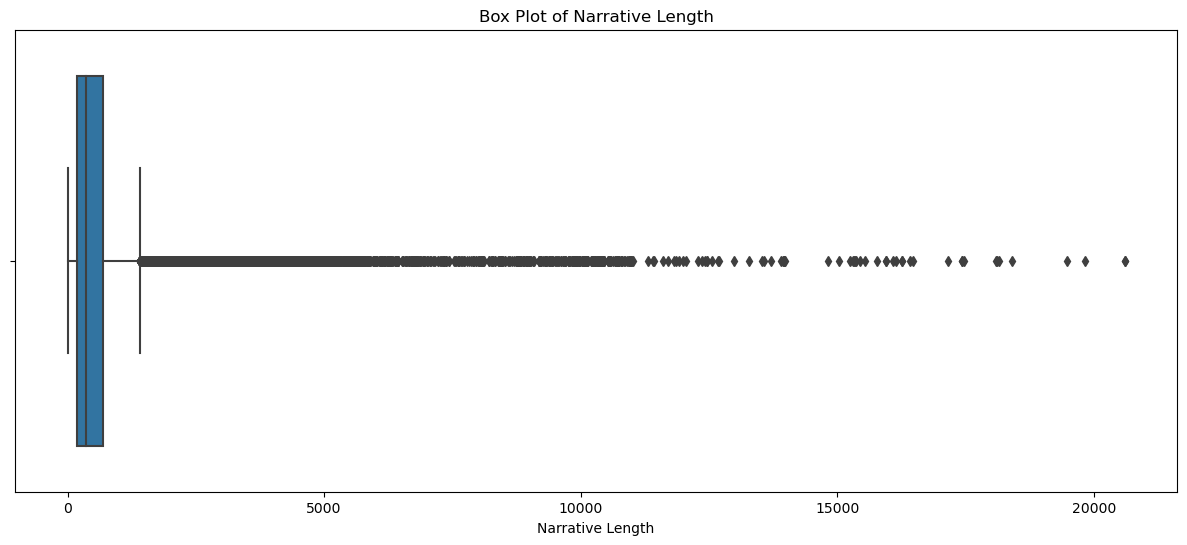

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(dt['narrative'].str.len())
plt.title('Box Plot of Narrative Length')
plt.xlabel('Narrative Length')
plt.show()

In [ ]:
from scipy import stats

dt.dropna(subset=['product', 'narrative'], inplace=True)
dt.drop_duplicates(subset=['product', 'narrative'], inplace=True)

dt['narrative_length'] = dt['narrative'].str.len()
print(dt.shape)
z_scores = stats.zscore(dt['narrative_length'])
dt['z_score'] = z_scores


threshold = 3
outliers = dt[dt['z_score'].abs() > threshold]
data = dt[dt['z_score'].abs() <= threshold]
print("Outliers based on Z-score:")
print(outliers)

(124676, 4)
Outliers based on Z-score:
        Unnamed: 0              product  \
45              45       retail_banking   
47              47          credit_card   
74              74     credit_reporting   
87              87       retail_banking   
168            168     credit_reporting   
...            ...                  ...   
161671      161671  mortgages_and_loans   
162061      162061     credit_reporting   
162249      162249  mortgages_and_loans   
162383      162383      debt_collection   
162389      162389  mortgages_and_loans   

                                                narrative  narrative_length  \
45      original message sent bank subject general acc...              4018   
47      issue concern discover credit card security de...              9071   
74      anyone us credit report another consumer repor...              3903   
87      original copy letter uploaded includes detail ...              9402   
168     block except otherwise provided section c

In [ ]:
data = data[data['narrative'].apply(lambda x: x.strip().lower() != 'name')]
data.shape

(122810, 5)

C:\Users\hello\Mohammed_anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


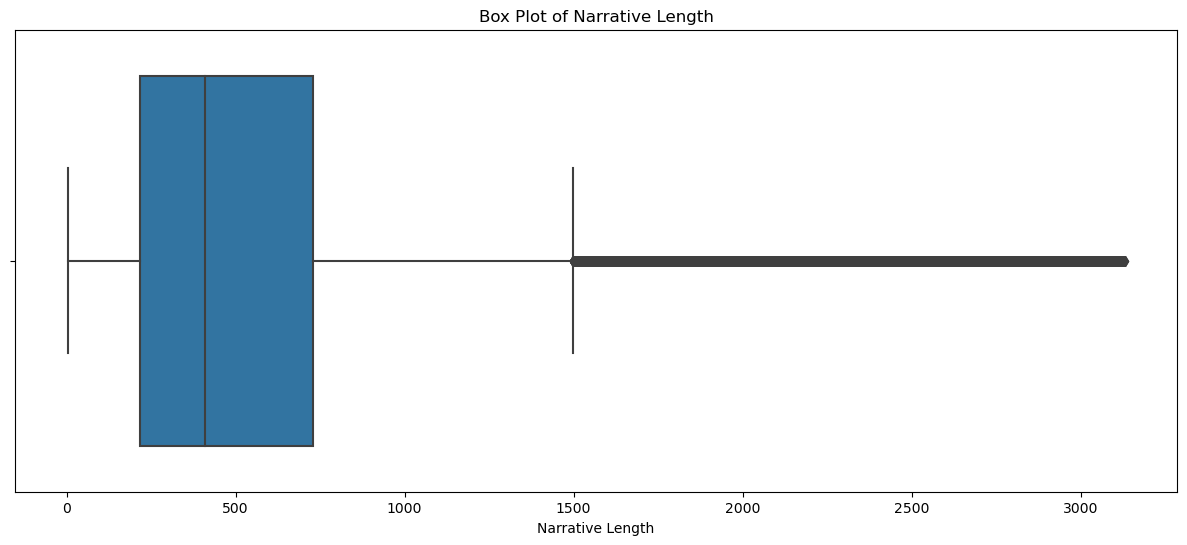

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data['narrative'].str.len())
plt.title('Box Plot of Narrative Length')
plt.xlabel('Narrative Length')
plt.show()

In [ ]:
data.iloc[47]

Unnamed: 0                                                         51
product                                               debt_collection
narrative           left apartment charging u usage credence colle...
narrative_length                                                  248
z_score                                                      -0.46289
Name: 51, dtype: object

In [ ]:


nlp = spacy.load('en_core_web_sm')


In [ ]:
def expand_contractions(text):
    contractions = {"don't": "do not", "won't": "will not", "can't": "cannot"}
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)
    return text

def spacy_preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)


data['narrative'] = data['narrative'].apply(expand_contractions).apply(spacy_preprocess)

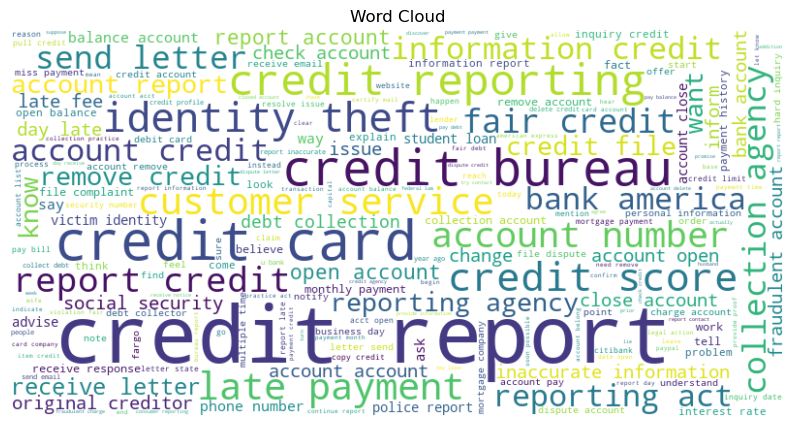

In [ ]:
text_before = ' '.join(data['narrative'].dropna().astype(str).tolist())
wordcloud_before = WordCloud(width=800, height=400, background_color='white').generate(text_before)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

C:\Users\hello\Mohammed_anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


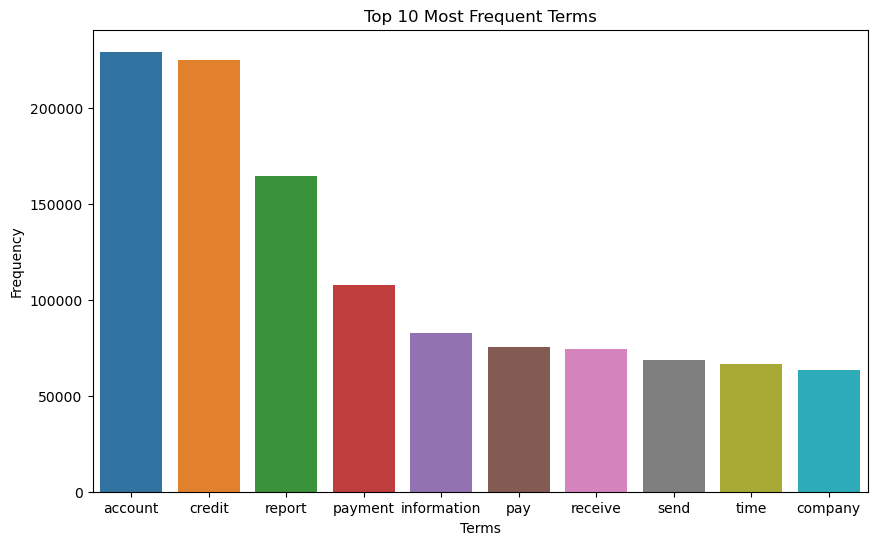

(122810, 6)

In [ ]:
data['tokens'] = data['narrative'].apply(lambda x: x.split())
all_tokens = [token for tokens in data['tokens'] for token in tokens]
counter = Counter(all_tokens)
most_common = counter.most_common(10)

terms, frequencies = zip(*most_common)
plt.figure(figsize=(10, 6))
sns.barplot(list(terms), list(frequencies))
plt.title('Top 10 Most Frequent Terms')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.show()
data.shape

In [ ]:
print(data.head())
data.shape

   Unnamed: 0           product  \
0           0       credit_card   
1           1       credit_card   
2           2    retail_banking   
3           3  credit_reporting   
4           4  credit_reporting   

                                           narrative  narrative_length  \
0  purchase order day shipping receive product we...              1705   
1  forward message date tue subject investigate c...               904   
2  forward message cc send friday pdt subject fin...              1230   
3  payment history miss credit report specialized...               903   
4  payment history miss credit report mistake acc...               851   

    z_score                                             tokens  
0  1.287243  [purchase, order, day, shipping, receive, prod...  
1  0.325090  [forward, message, date, tue, subject, investi...  
2  0.716678  [forward, message, cc, send, friday, pdt, subj...  
3  0.323889  [payment, history, miss, credit, report, speci...  
4  0.261427  [payme

(122810, 6)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from gensim.models import Word2Vec
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from scipy import stats
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)

X_tfidf = tfidf.fit_transform(data['narrative'])

y = data['product'].astype('category').cat.codes


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


precision = precision_score(y_test, y_pred, average=None)
print("Precision for each class:")
for i, p in enumerate(precision):
    print(f"Class {i}: {p:.2f}")


recall = recall_score(y_test, y_pred, average=None)
print("Recall for each class:")
for i, r in enumerate(recall):
    print(f"Class {i}: {r:.2f}")


f1 = f1_score(y_test, y_pred, average=None)
print("F1-Score for each class:")
for i, f in enumerate(f1):
    print(f"Class {i}: {f:.2f}")

Accuracy: 0.85
Confusion Matrix:
[[ 2372   324    70    43   199]
 [  225 10029   576   308    56]
 [  114   676  3071   162    48]
 [   48   345   105  3104    63]
 [  151    52    24    54  2343]]
Precision for each class:
Class 0: 0.82
Class 1: 0.88
Class 2: 0.80
Class 3: 0.85
Class 4: 0.86
Recall for each class:
Class 0: 0.79
Class 1: 0.90
Class 2: 0.75
Class 3: 0.85
Class 4: 0.89
F1-Score for each class:
Class 0: 0.80
Class 1: 0.89
Class 2: 0.78
Class 3: 0.85
Class 4: 0.88


In [ ]:
model2 = LinearSVC(random_state=42)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


precision = precision_score(y_test, y_pred, average=None)
print("Precision for each class:")
for i, p in enumerate(precision):
    print(f"Class {i}: {p:.2f}")


recall = recall_score(y_test, y_pred, average=None)
print("Recall for each class:")
for i, r in enumerate(recall):
    print(f"Class {i}: {r:.2f}")


f1 = f1_score(y_test, y_pred, average=None)
print("F1-Score for each class:")
for i, f in enumerate(f1):
    print(f"Class {i}: {f:.2f}")

Accuracy: 0.85
Confusion Matrix:
[[2375  315   77   47  194]
 [ 235 9993  580  315   71]
 [ 112  667 3065  179   48]
 [  47  334  116 3098   70]
 [ 159   60   28   47 2330]]
Precision for each class:
Class 0: 0.81
Class 1: 0.88
Class 2: 0.79
Class 3: 0.84
Class 4: 0.86
Recall for each class:
Class 0: 0.79
Class 1: 0.89
Class 2: 0.75
Class 3: 0.85
Class 4: 0.89
F1-Score for each class:
Class 0: 0.80
Class 1: 0.89
Class 2: 0.77
Class 3: 0.84
Class 4: 0.87


In [ ]:
model3 = GradientBoostingClassifier(random_state=42)
model3.fit(X_train, y_train)


y_pred = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


precision = precision_score(y_test, y_pred, average=None)
print("Precision for each class:")
for i, p in enumerate(precision):
    print(f"Class {i}: {p:.2f}")


recall = recall_score(y_test, y_pred, average=None)
print("Recall for each class:")
for i, r in enumerate(recall):
    print(f"Class {i}: {r:.2f}")


f1 = f1_score(y_test, y_pred, average=None)
print("F1-Score for each class:")
for i, f in enumerate(f1):
    print(f"Class {i}: {f:.2f}")

Accuracy: 0.82
Confusion Matrix:
[[ 2205   485    83    38   197]
 [  216 10048   634   251    45]
 [  118   855  2881   157    60]
 [   40   512   126  2901    86]
 [  184   153    22    51  2214]]
Precision for each class:
Class 0: 0.80
Class 1: 0.83
Class 2: 0.77
Class 3: 0.85
Class 4: 0.85
Recall for each class:
Class 0: 0.73
Class 1: 0.90
Class 2: 0.71
Class 3: 0.79
Class 4: 0.84
F1-Score for each class:
Class 0: 0.76
Class 1: 0.86
Class 2: 0.74
Class 3: 0.82
Class 4: 0.85


In [ ]:
model4 = RandomForestClassifier(n_estimators=100, random_state=42)
model4.fit(X_train, y_train)


y_pred = model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


precision = precision_score(y_test, y_pred, average=None)
print("Precision for each class:")
for i, p in enumerate(precision):
    print(f"Class {i}: {p:.2f}")


recall = recall_score(y_test, y_pred, average=None)
print("Recall for each class:")
for i, r in enumerate(recall):
    print(f"Class {i}: {r:.2f}")


f1 = f1_score(y_test, y_pred, average=None)
print("F1-Score for each class:")
for i, f in enumerate(f1):
    print(f"Class {i}: {f:.2f}")

Accuracy: 0.86
Confusion Matrix:
[[ 2203   415    73    84   233]
 [  108 10583   349   126    28]
 [   96   807  2967   153    48]
 [   50   451   104  2976    84]
 [  177    84    21    67  2275]]
Precision for each class:
Class 0: 0.84
Class 1: 0.86
Class 2: 0.84
Class 3: 0.87
Class 4: 0.85
Recall for each class:
Class 0: 0.73
Class 1: 0.95
Class 2: 0.73
Class 3: 0.81
Class 4: 0.87
F1-Score for each class:
Class 0: 0.78
Class 1: 0.90
Class 2: 0.78
Class 3: 0.84
Class 4: 0.86


In [ ]:
voting_model = VotingClassifier(
    estimators=[
        ('lr', model),
        ('svc', model2),
        ('rf', model4)
    ],
    voting='hard'
)


voting_model.fit(X_train, y_train)


y_pred = voting_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


precision = precision_score(y_test, y_pred, average=None)
print("Precision for each class:")
for i, p in enumerate(precision):
    print(f"Class {i}: {p:.2f}")


recall = recall_score(y_test, y_pred, average=None)
print("Recall for each class:")
for i, r in enumerate(recall):
    print(f"Class {i}: {r:.2f}")


f1 = f1_score(y_test, y_pred, average=None)
print("F1-Score for each class:")
for i, f in enumerate(f1):
    print(f"Class {i}: {f:.2f}")

Accuracy: 0.86
Confusion Matrix:
[[ 2403   318    60    37   190]
 [  209 10111   548   275    51]
 [  116   675  3082   156    42]
 [   51   343   102  3114    55]
 [  153    58    20    47  2346]]
Precision for each class:
Class 0: 0.82
Class 1: 0.88
Class 2: 0.81
Class 3: 0.86
Class 4: 0.87
Recall for each class:
Class 0: 0.80
Class 1: 0.90
Class 2: 0.76
Class 3: 0.85
Class 4: 0.89
F1-Score for each class:
Class 0: 0.81
Class 1: 0.89
Class 2: 0.78
Class 3: 0.85
Class 4: 0.88


In [ ]:
base_models = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('lsvc', LinearSVC(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]


meta_model = RandomForestClassifier(n_estimators=100, random_state=42)


stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)


stacking_model.fit(X_train, y_train)


y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


precision = precision_score(y_test, y_pred, average=None)
print("Precision for each class:")
for i, p in enumerate(precision):
    print(f"Class {i}: {p:.2f}")


recall = recall_score(y_test, y_pred, average=None)
print("Recall for each class:")
for i, r in enumerate(recall):
    print(f"Class {i}: {r:.2f}")


f1 = f1_score(y_test, y_pred, average=None)
print("F1-Score for each class:")
for i, f in enumerate(f1):
    print(f"Class {i}: {f:.2f}")

Accuracy: 0.87
Confusion Matrix:
[[ 2452   232    78    45   201]
 [  165 10252   564   168    45]
 [  106   492  3282   151    40]
 [   52   334   112  3116    51]
 [  155    39    24    55  2351]]
Precision for each class:
Class 0: 0.84
Class 1: 0.90
Class 2: 0.81
Class 3: 0.88
Class 4: 0.87
Recall for each class:
Class 0: 0.82
Class 1: 0.92
Class 2: 0.81
Class 3: 0.85
Class 4: 0.90
F1-Score for each class:
Class 0: 0.83
Class 1: 0.91
Class 2: 0.81
Class 3: 0.87
Class 4: 0.89


In [ ]:
bagging_model = BaggingClassifier(estimator=model4 , n_estimators=10, random_state=42, n_jobs=-1)

# Train the bagging model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred = bagging_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


precision = precision_score(y_test, y_pred, average=None)
print("Precision for each class:")
for i, p in enumerate(precision):
    print(f"Class {i}: {p:.2f}")


recall = recall_score(y_test, y_pred, average=None)
print("Recall for each class:")
for i, r in enumerate(recall):
    print(f"Class {i}: {r:.2f}")


f1 = f1_score(y_test, y_pred, average=None)
print("F1-Score for each class:")
for i, f in enumerate(f1):
    print(f"Class {i}: {f:.2f}")

Accuracy: 0.85
Confusion Matrix:
[[ 2149   459    64    85   251]
 [  105 10616   310   128    35]
 [   86   872  2909   154    50]
 [   37   490    96  2963    79]
 [  170    92    17    62  2283]]
Precision for each class:
Class 0: 0.84
Class 1: 0.85
Class 2: 0.86
Class 3: 0.87
Class 4: 0.85
Recall for each class:
Class 0: 0.71
Class 1: 0.95
Class 2: 0.71
Class 3: 0.81
Class 4: 0.87
F1-Score for each class:
Class 0: 0.77
Class 1: 0.89
Class 2: 0.78
Class 3: 0.84
Class 4: 0.86


In [ ]:

class_names = data['product'].astype('category').cat.categories

class_2_name = class_names[2]

print(f"Class 2 corresponds to: {class_2_name}")

Class 2 corresponds to: debt_collection


In [ ]:
class_counts = data['product'].value_counts()

print("Number of rows for each class:")
print(class_counts)

Number of rows for each class:
credit_reporting       55575
debt_collection        20857
mortgages_and_loans    18283
credit_card            14816
retail_banking         13279
Name: product, dtype: int64


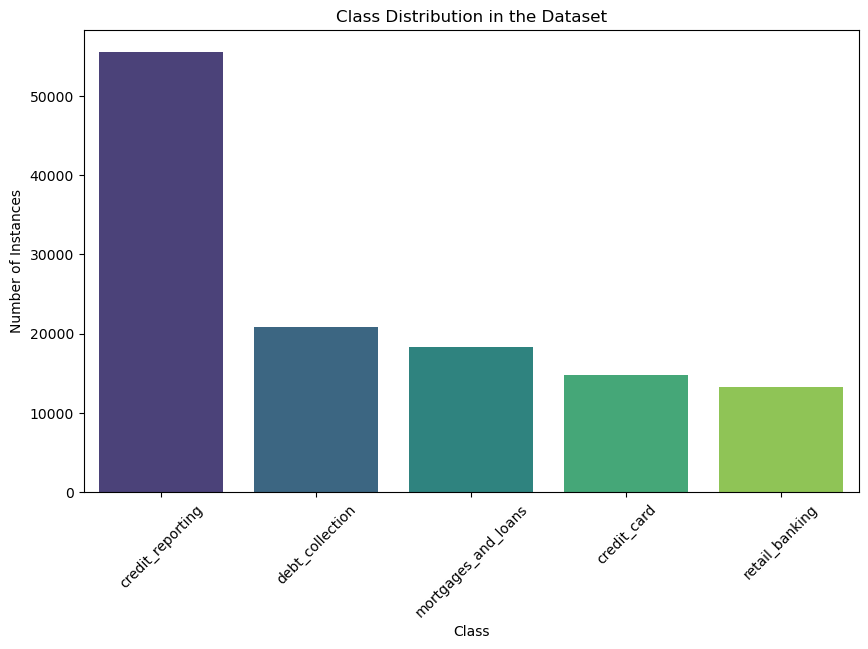

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution in the Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

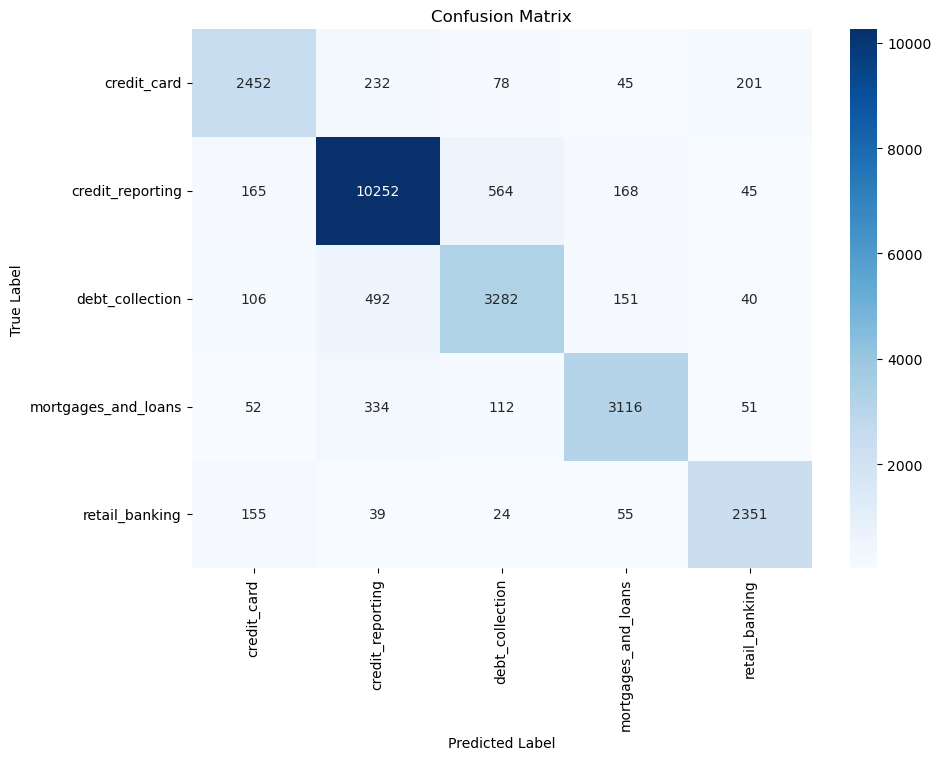

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import joblib
joblib.dump(stacking_model, 'stacking_model.pkl')